In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


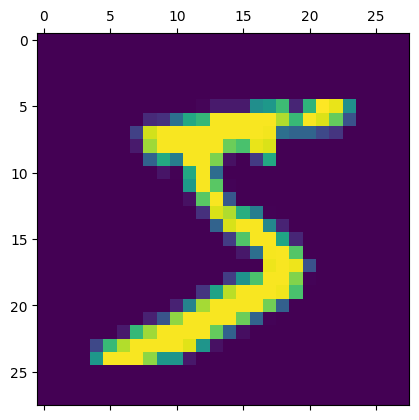

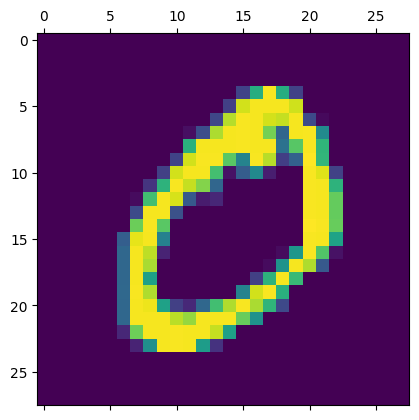

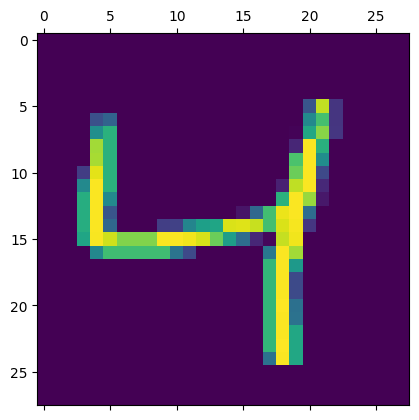

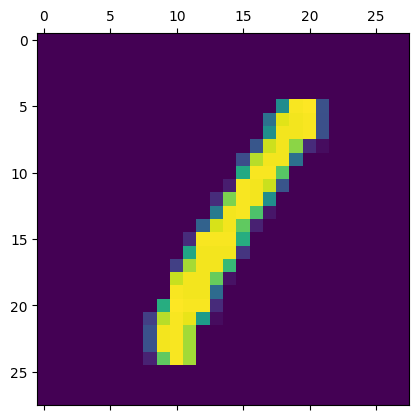

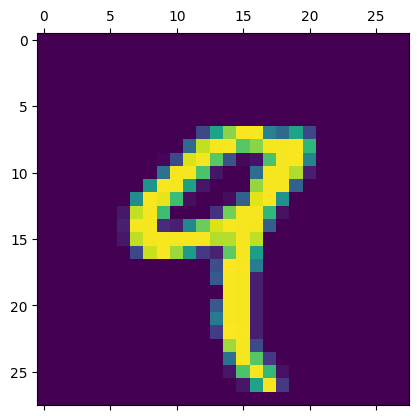

In [3]:
#plotting mnist data
for i in range(0,5):
    plt.matshow(X_train[i])


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
#scaling the data
X_train = X_train / 255
X_test = X_test / 255

In [9]:
#reshapping arrays
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4728 - accuracy: 0.8759
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3049 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2736 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2619 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2579 - accuracy: 0.9284
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2528 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.251

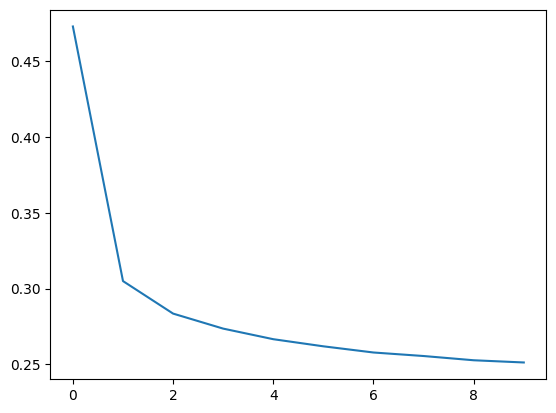

In [12]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [13]:
#evaluating the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2638 - accuracy: 0.9268


[0.26381805539131165, 0.926800012588501]

In [14]:
#Predicitng on train and test data
train_predict = model.predict(X_train_flattened)
test_predict = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [15]:
y_predicted_labels = [np.argmax(i) for i in test_predict]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [16]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    5,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   4,    8,  924,   17,    6,    4,   11,   13,   41,    4],
       [   2,    0,   15,  923,    0,   25,    2,   12,   24,    7],
       [   1,    1,    6,    2,  906,    0,    9,    5,   10,   42],
       [   9,    2,    1,   36,    6,  779,   12,    9,   31,    7],
       [  11,    3,    7,    2,    7,   13,  911,    2,    2,    0],
       [   1,    6,   21,    6,    4,    1,    0,  954,    3,   32],
       [   6,    7,    6,   21,    9,   24,    9,   12,  871,    9],
       [   9,    6,    1,   10,   18,    4,    0,   29,    8,  924]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

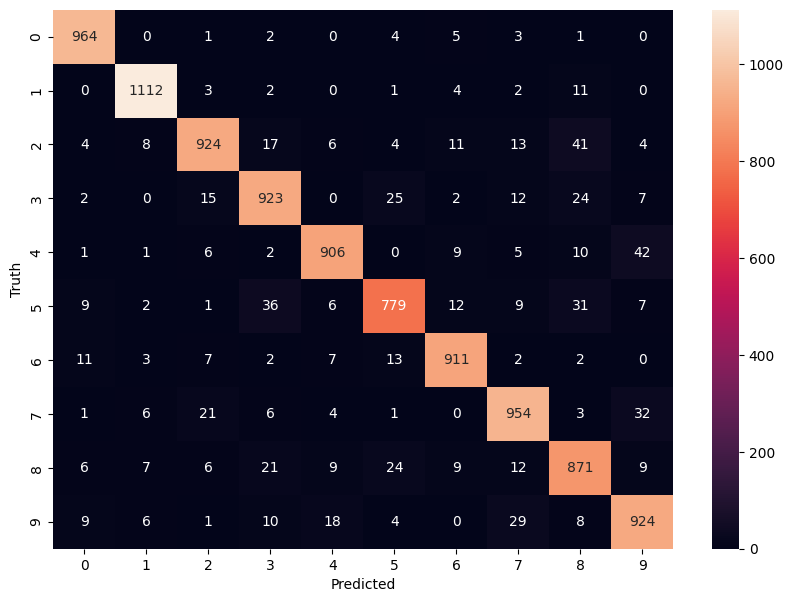

In [17]:
#plotting confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Hidden layer to improve model performance

In [18]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1269 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0889 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0671 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0429 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0275 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

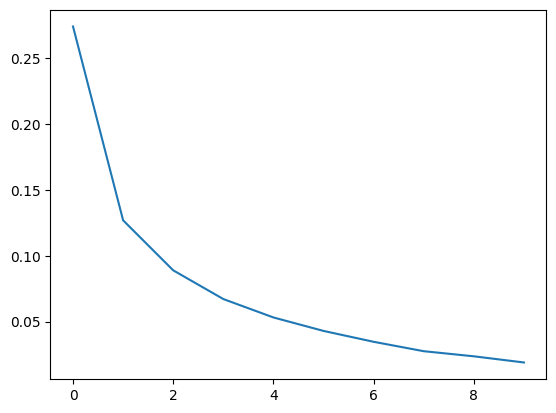

In [19]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

In [20]:
#evaluating the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9761


[0.0813785120844841, 0.9761000275611877]

In [21]:
#Predicitng on train and test data
train_predict = model.predict(X_train_flattened)
test_predict = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [22]:
y_predicted_labels = [np.argmax(i) for i in test_predict]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [23]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    2,    1,    1,    4,    0,    2,    1],
       [   1, 1120,    1,    3,    0,    0,    2,    1,    6,    1],
       [   6,    2,  998,    5,    3,    0,    4,    5,    8,    1],
       [   0,    0,    2,  985,    0,    8,    1,    5,    3,    6],
       [   0,    0,    2,    1,  962,    0,    5,    1,    0,   11],
       [   1,    1,    0,    6,    2,  869,    6,    0,    4,    3],
       [   6,    2,    2,    0,    9,    2,  933,    0,    4,    0],
       [   2,    5,    9,    5,    1,    0,    0,  991,    7,    8],
       [   3,    0,    3,    4,    6,    7,    1,    2,  942,    6],
       [   2,    2,    0,    5,    3,    3,    0,    1,    2,  991]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

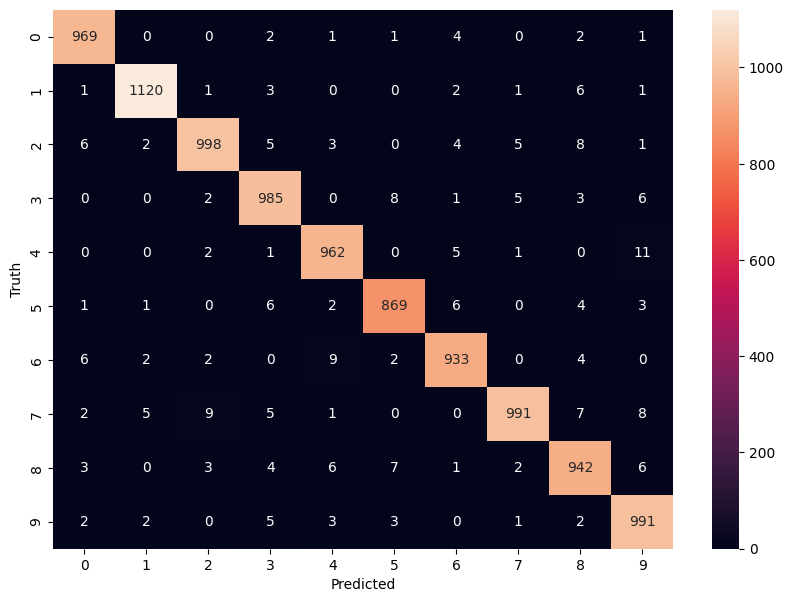

In [24]:
#plotting confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')